# Regresión lineal y Árboles de decisión

Una tarea muy común dentro del aprendizaje estadístico es el tener que hacer regresiones qué básicamente es detectar la relación funcional entre una variable medida o respuesta y su variable de control. 

$$
f(x) = y
$$

Nosotros queremos construir una función $\hat {f}$ que reciba a los datos $x$ con el menor error posible. En este notebook veremos la implementación con `sklearn` de una relación lineal en la que presuponemos que el modelo subyecente a la generación de los datos es una línea recta

$$
\hat {f}(x) = mx + b + \epsilon
$$

donde $\epsilon$ es el término de error que deseamos sea lo más pequeño posible.

In [47]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import matplotlib 
%matplotlib inline
from matplotlib import pyplot as plt

## Datos

Para el entrenamiento usaremos datos y los vamos a generar con el método `make_regression` que es útil para generar datos dependientes de uno o más parámetros de control, adicionalmente le podemos poner ruido.

Después debemos hacer los conjuntos de entrenamiento y prueba, usualmente los tenemos que dividir en dos porciones que van desde el 75% al 80% mientras que el de prueba **debe ser un cojunto ajeno** al de entrenamiento y para eso usamos la proporción restante

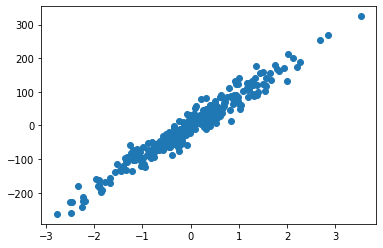

In [103]:
regresion_ds = make_regression(n_samples=300, n_features=1, noise=20.5)
X, y = regresion_ds

plt.scatter(X,y)

Para hacer el conjunto de entrenamiento y el de prueba vamos a elegir al azar el 75% de los datos junto con sus correspondientes respuestas asociadas.

In [104]:
idxs = list(range(len(X)))
marca = int(len(idxs)*0.75)
Xt, Xs = np.copy(X[:marca]), np.copy(X[marca:]) #conjuntos entrenamiento y prueba
yt, ys = np.copy(y[:marca]), np.copy(y[marca:]) #respuestas entrenamiento y prueba

## Regresión lineal

 Vamos a hacer una regresión de este conjunto de datos

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree         import DecisionTreeRegressor

La regresión canónica de este problema lineal la podemos hacer con la función `LinearReression`. En `sklearn` el método `fit` y `fit_transform` se encarga de hacer el entrenamiento del método, éste método recibe los datos, `X`, y la respuesta esperada `y`.

In [105]:
regr = LinearRegression(fit_intercept=True)
regr.fit(Xt,yt) #aplica OLS

LinearRegression()

Después de entrenado podemos verificar en cuánto error incurre la regresión a través del método `score` que esencialmente calcula el coeficiente de determinación $R^2 = 1 - \frac {\sum (y_{pred}- y_{real})^2} {\sum ({y_{pred}- \bar {y}})^2}$. Mientras más cercano a 1 quiere decir que la predicción y el valor esperado se parecen más. Este cálculo lo vamos a hacer con el conjunto de prueba.

In [106]:
regr.score(Xs,ys)

0.9560905849895854

Los coeficientes los podemos obtener de la siguiente manera

In [108]:
m = regr.coef_
b = regr.intercept_
print(m,b)

[89.92614159] -0.2539846022979657


Y ya con esto podemos exhibir gráficamente la regresión a través del modelo 
$$
y = mx + b
$$

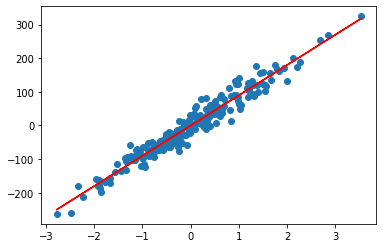

In [109]:
yp = m*Xt + b
plt.scatter(Xt,yt)
plt.plot(Xt,yp, 'r')

Pero cómo modelo de aprendizaje estadístico podemos usar el método `predict`

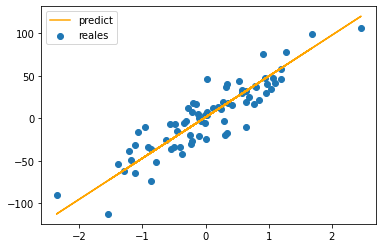

In [44]:
fix, ax = plt.subplots()
yy = regr.predict(Xs)
ax.scatter(Xs,ys)
ax.plot(Xs,yy,'orange')
ax.legend(['predict', 'reales'])

## Árbol de decisión

Vamos a hacer ahora un árbol de decisión usando el conjunto de datos de `boston` que viene en `sklearn`.

Un **árbol de decisión** es un algoritmo de aprendizaje estadístico que implementa las decisiones plasmadas en los datos en un árbol. Muy útil para modelas datos con una naturaleza no lineal en ellos.


<img src="./sphx_glr_plot_tree_regression_001.png" >

En el ejemplo los datos reales están plasmados con puntos naranjas y hay dos modelos de árbol entrenados en esos datos: los azules y los verdes. Estos con diferentes niveles de precisión aproximan a los datos.

In [111]:
boston = load_boston()
X, y = boston['data'], boston['target']
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

En vez de hacer la separación manual la podemos hacer usando el método `train_test_split` que separa automáticamente los datos en entrenamiento y prueba.


In [113]:
Xt, Xs, yt, ys = train_test_split(X, y)

Vamos a implementar un árbol de decisión con una profundidad de 5 niveles.

In [126]:
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(Xt,yt)

DecisionTreeRegressor(max_depth=5)

Podemos ver que en el conjunto de prueba, la predicción parece ser bastante buena:


In [127]:
regr.score(Xs, ys)

0.7446304617623651

En un árbol de decisión (así como en otros algoritmos) podemos ver la importancia que tiene cada atrbituo dentro de la predicción

In [80]:
regr.feature_importances_

array([0.04313955, 0.        , 0.        , 0.00096408, 0.04420959,
       0.6131874 , 0.        , 0.07377308, 0.        , 0.00496307,
       0.00398298, 0.01230294, 0.20347732])

In [82]:
for i,prc in enumerate(regr.feature_importances_):
    print("Atributo {} : {} %".format(i+1, int(prc*100)))

Atributo 1 : 4 %
Atributo 2 : 0 %
Atributo 3 : 0 %
Atributo 4 : 0 %
Atributo 5 : 4 %
Atributo 6 : 61 %
Atributo 7 : 0 %
Atributo 8 : 7 %
Atributo 9 : 0 %
Atributo 10 : 0 %
Atributo 11 : 0 %
Atributo 12 : 1 %
Atributo 13 : 20 %


Específicamente esos atributos son:

In [84]:
feats = boston['feature_names']
for ft, prc in zip(feats, regr.feature_importances_):
    print("Atributo {} : {} % importancia".format(ft, int(prc*100)))

Atributo CRIM : 4 % importancia
Atributo ZN : 0 % importancia
Atributo INDUS : 0 % importancia
Atributo CHAS : 0 % importancia
Atributo NOX : 4 % importancia
Atributo RM : 61 % importancia
Atributo AGE : 0 % importancia
Atributo DIS : 7 % importancia
Atributo RAD : 0 % importancia
Atributo TAX : 0 % importancia
Atributo PTRATIO : 0 % importancia
Atributo B : 1 % importancia
Atributo LSTAT : 20 % importancia


La predicción en el conjunto de prueba es

Text(0, 0.5, 'Prediccion')

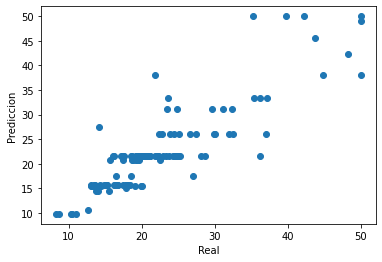

In [128]:
plt.scatter(ys, regr.predict(Xs))
plt.xlabel('Real')
plt.ylabel('Prediccion')

Existen varias formas para visualizar un árbol. Una de ellas es a través del objeto `sklearn.tree` usando el método `export_text`

In [129]:
from sklearn import tree


In [130]:
arbol = tree.export_text(regr)
print(arbol)

|--- feature_5 <= 6.97
|   |--- feature_12 <= 14.40
|   |   |--- feature_12 <= 4.91
|   |   |   |--- feature_7 <= 2.60
|   |   |   |   |--- feature_9 <= 534.50
|   |   |   |   |   |--- value: [41.30]
|   |   |   |   |--- feature_9 >  534.50
|   |   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_7 >  2.60
|   |   |   |   |--- feature_2 <= 6.66
|   |   |   |   |   |--- value: [31.18]
|   |   |   |   |--- feature_2 >  6.66
|   |   |   |   |   |--- value: [24.70]
|   |   |--- feature_12 >  4.91
|   |   |   |--- feature_7 <= 1.21
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_7 >  1.21
|   |   |   |   |--- feature_5 <= 6.54
|   |   |   |   |   |--- value: [21.62]
|   |   |   |   |--- feature_5 >  6.54
|   |   |   |   |   |--- value: [26.03]
|   |--- feature_12 >  14.40
|   |   |--- feature_4 <= 0.61
|   |   |   |--- feature_0 <= 0.55
|   |   |   |   |--- feature_7 <= 5.57
|   |   |   |   |   |--- value: [20.83]
|   |   |   |   |--- feature_7 >  5.57
|   |   |   |   |

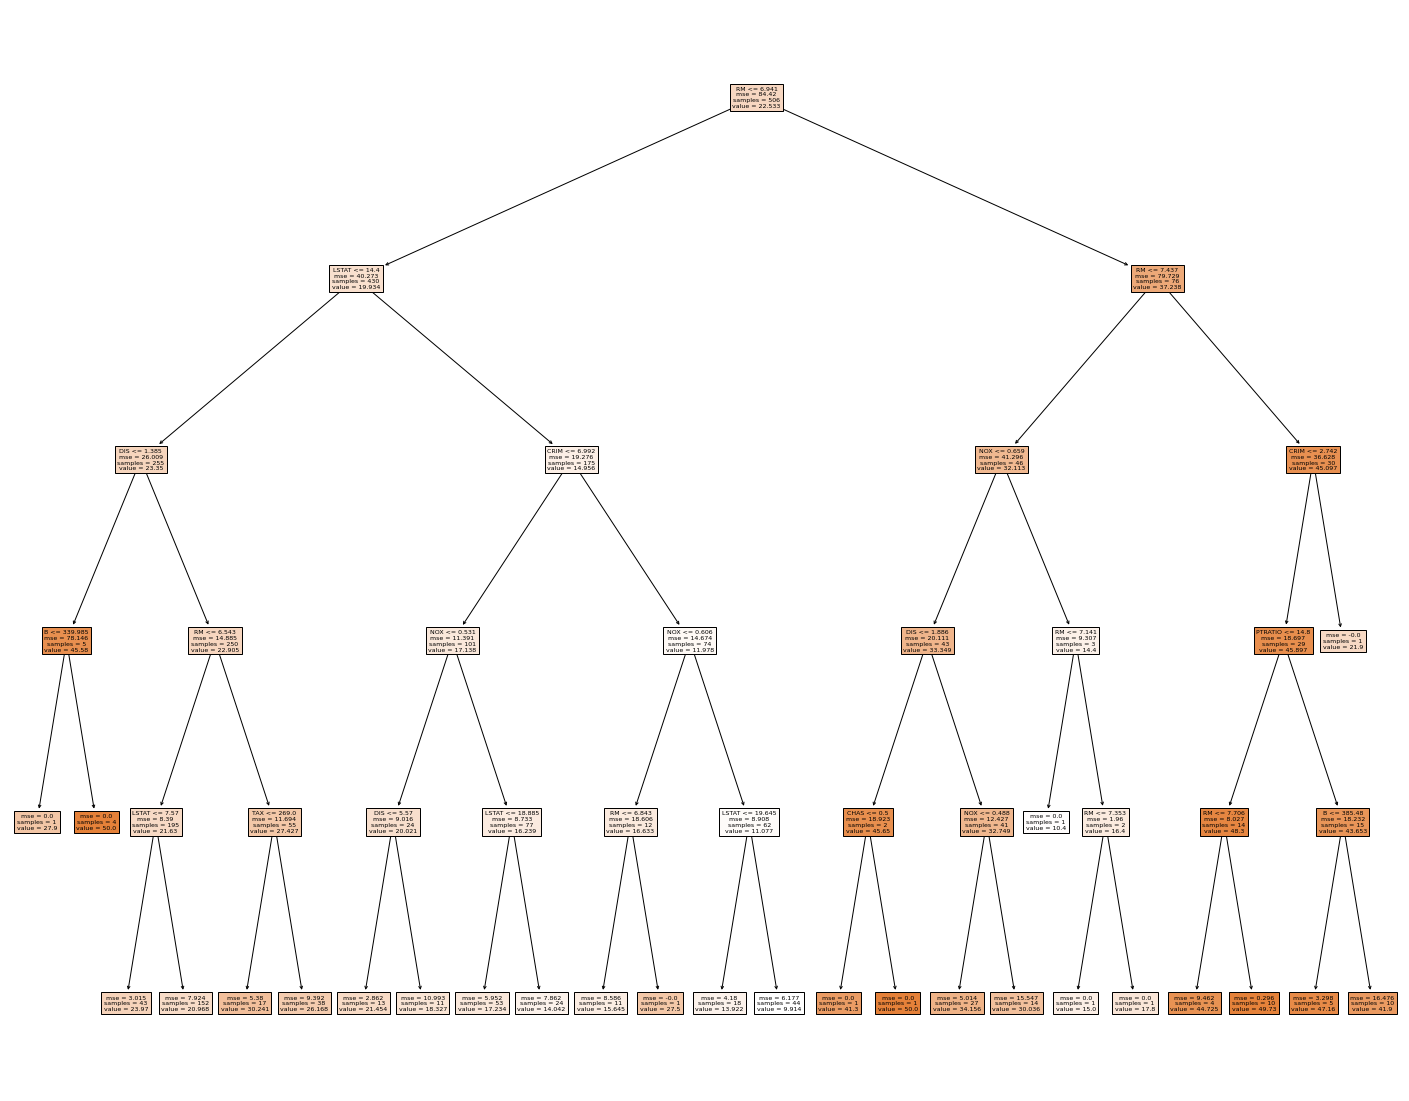

In [98]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, 
                   feature_names=feats,
                   class_names=boston.feature_names,
                   filled=True)


## Ejercicios
1. Carga el conjunto de iris y conócelo (búsquenlo en Wikipedia)
1. Usa el ábol de decision para clasificar 
1. Gráfica el árbol final.

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

clf = DecisionTreeClassifier(max_depth=4)
